In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## P4

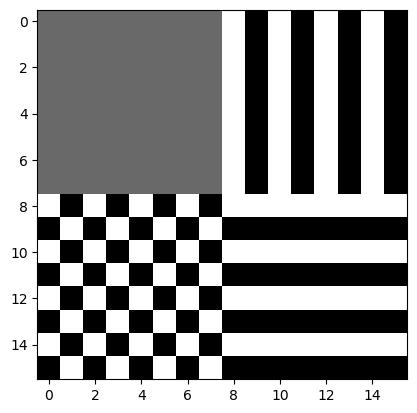

In [18]:
#Read image in grayscale:
img = cv2.imread('imgs/img_16x16.png')
#convert to grayscale:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#convert to numpy array:
img = np.array(img, dtype=np.uint8)
#print(img)

plot = plt.imshow(img, cmap='gray')
plt.show()


In [6]:
def grey_hist(img_array):
    hist = np.histogram(img_array, bins=8, range=(0, 256))
    hist = (hist[0]/np.max(hist[0]), hist[1])
    return hist

In [7]:
#2x2 grid of histograms:
grey_hist_list =  [grey_hist(img[0:7,0:7]),
                   grey_hist(img[0:7,8:15]), 
                   grey_hist(img[8:15,0:7]), 
                   grey_hist(img[8:15,8:15])]


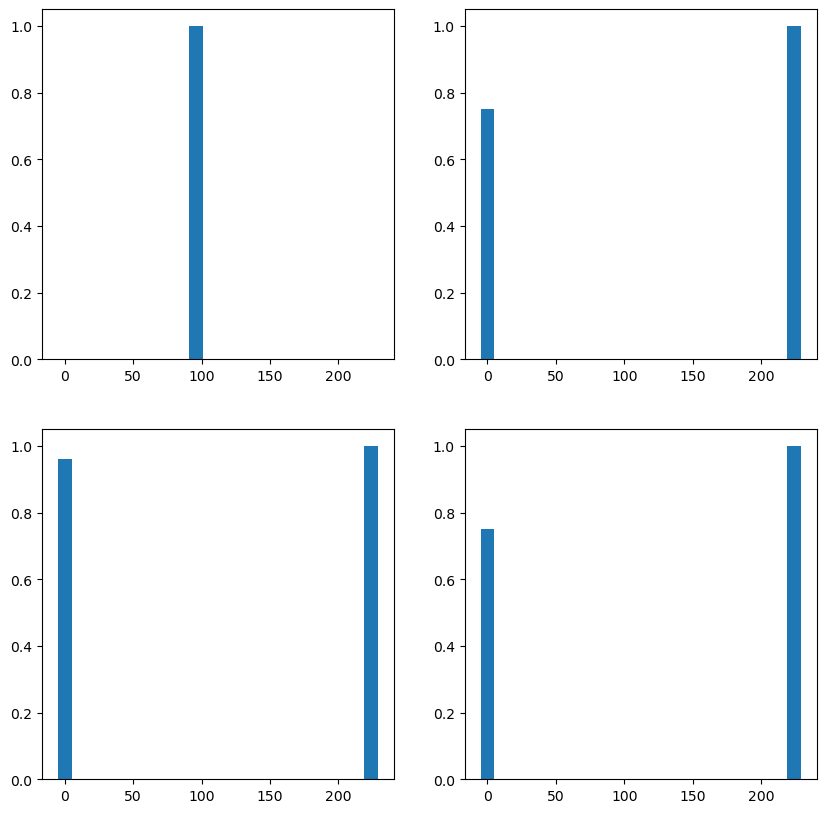

In [8]:
# Plot grey_hist_list in a 2x2 grid:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].bar(grey_hist_list[0][1][:-1], grey_hist_list[0][0], width=10)
axs[0, 1].bar(grey_hist_list[1][1][:-1], grey_hist_list[1][0], width=10)
axs[1, 0].bar(grey_hist_list[2][1][:-1], grey_hist_list[2][0], width=10)
axs[1, 1].bar(grey_hist_list[3][1][:-1], grey_hist_list[3][0], width=10)

plt.show()


## P5

In [9]:
# Calculate the gradient (Angle and magnitude) using partial derivatives:

def HOG(img):

    angle_list = []

    for i in range(img.shape[0]-1):
        for j in range(img.shape[1]-1):
            gx = img[i+1,j] - img[i,j]
            gy = img[i,j+1] - img[i,j]
            angle = np.arctan(gy/gx)*180/np.pi # Angle in degrees
            angle_list.append(angle) 
    
    hist = np.histogram(angle_list, bins=8, range=(-180, 180))

    return hist




In [10]:
HOG(img[0:7,0:7])

/tmp/ipykernel_117951/1499426599.py:11: RuntimeWarning: invalid value encountered in ubyte_scalars
  angle = np.arctan(gy/gx)*180/np.pi # Angle in degrees


(array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([-180., -135.,  -90.,  -45.,    0.,   45.,   90.,  135.,  180.]))

In [11]:
#2x2 grid of histograms:
HOG_list = [HOG(img[0:7,0:7]),
            HOG(img[0:7,8:15]), 
            HOG(img[8:15,0:7]), 
            HOG(img[8:15,8:15])]

/tmp/ipykernel_117951/1499426599.py:11: RuntimeWarning: invalid value encountered in ubyte_scalars
  angle = np.arctan(gy/gx)*180/np.pi # Angle in degrees
/tmp/ipykernel_117951/1499426599.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  gy = img[i,j+1] - img[i,j]
/tmp/ipykernel_117951/1499426599.py:11: RuntimeWarning: divide by zero encountered in ubyte_scalars
  angle = np.arctan(gy/gx)*180/np.pi # Angle in degrees
/tmp/ipykernel_117951/1499426599.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  gx = img[i+1,j] - img[i,j]


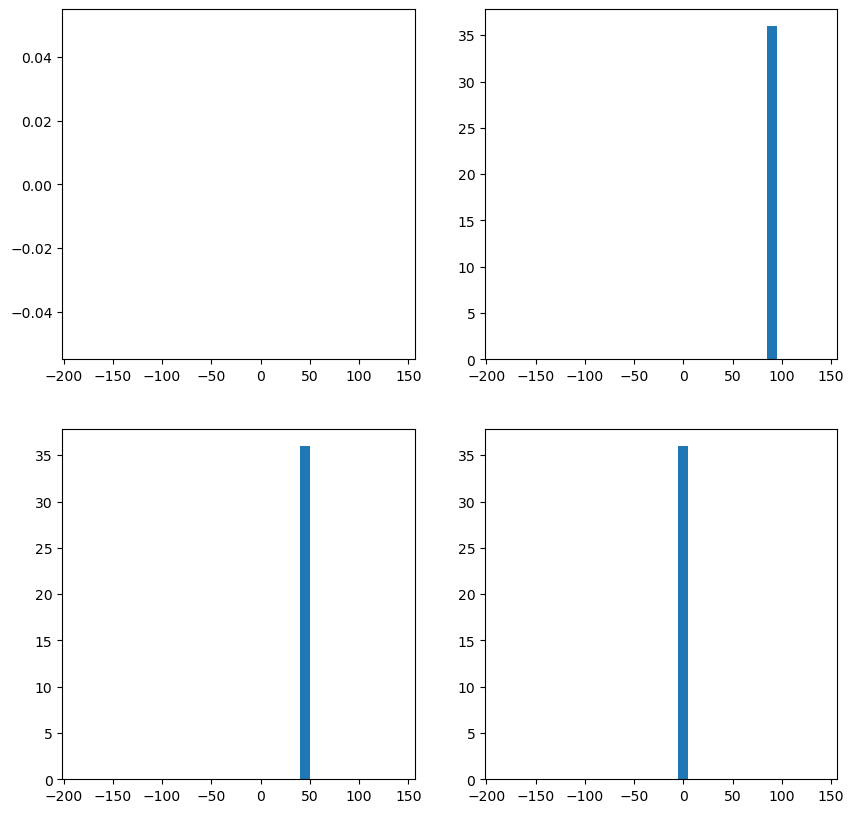

In [12]:
# Plot grey_hist_list in a 2x2 grid:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].bar(HOG_list[0][1][:-1], HOG_list[0][0], width=10)
axs[0, 1].bar(HOG_list[1][1][:-1], HOG_list[1][0], width=10)
axs[1, 0].bar(HOG_list[2][1][:-1], HOG_list[2][0], width=10)
axs[1, 1].bar(HOG_list[3][1][:-1], HOG_list[3][0], width=10)

plt.show()

### Verificar grafico (1,2) y (2,2). Angulos parecen estar intercambiado ###


## P6

In [19]:
#resize image:
w=2
h=2
img = cv2.resize(img, (4*2*w, 4*2*h), interpolation = cv2.INTER_AREA)
print(img.shape)

(16, 16)


In [65]:
# defiinition of EHD filters:
EHD_filter_1 = np.array([[1, -1], [1,-1]])
EHD_filter_2 = np.array([[1, 1], [-1,-1]])
EHD_filter_3 = np.array([[np.sqrt(2),0], [0,-np.sqrt(2)]])
EHD_filter_4 = np.array([[0, np.sqrt(2)], [-np.sqrt(2), 0]])
EHD_filter_5 = np.array([[2, -2], [-2, 2]])




In [66]:
# Funtion Apply EHD filters to image:
def EHD(img, filter):
    img_filtered = cv2.filter2D(img, -1, filter)
    return img_filtered


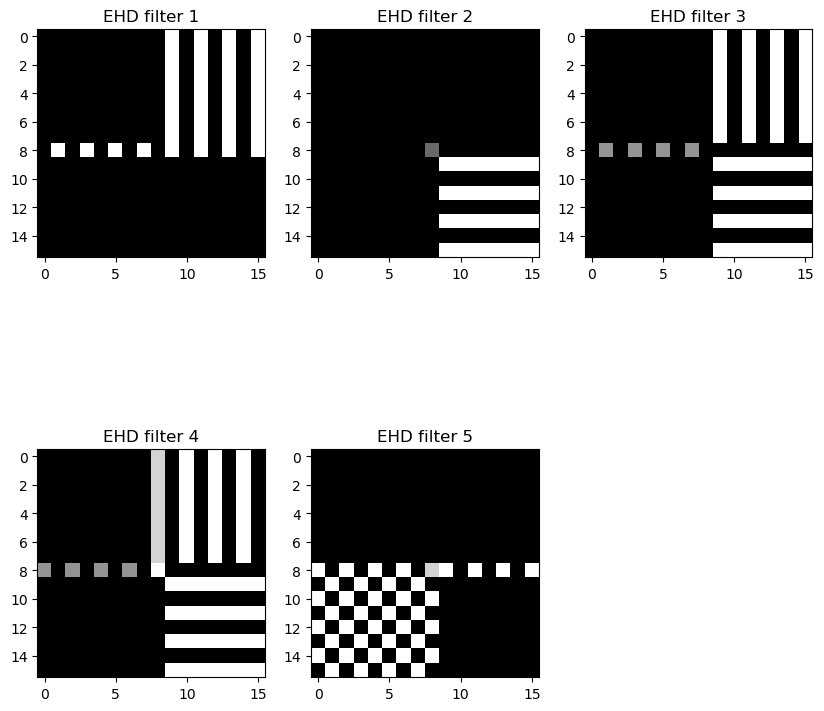

In [87]:
img_filtered_1 = EHD(img, EHD_filter_1)
img_filtered_2 = EHD(img, EHD_filter_2)
img_filtered_3 = EHD(img, EHD_filter_3)
img_filtered_4 = EHD(img, EHD_filter_4)
img_filtered_5 = EHD(img, EHD_filter_5)

# Plot EHD filters:
fig, axs = plt.subplots(2, 3, figsize=(10, 10))
axs[0, 0].imshow(img_filtered_1, cmap='gray')
axs[0, 1].imshow(img_filtered_2, cmap='gray')
axs[0, 2].imshow(img_filtered_3, cmap='gray')
axs[1, 0].imshow(img_filtered_4, cmap='gray')
axs[1, 1].imshow(img_filtered_5, cmap='gray')

#add title to each subplot:
axs[0, 0].set_title('EHD filter 1')
axs[0, 1].set_title('EHD filter 2')
axs[0, 2].set_title('EHD filter 3')
axs[1, 0].set_title('EHD filter 4')
axs[1, 1].set_title('EHD filter 5')
fig.delaxes(axs[1,2])

plt.show()



In [95]:
# Join filtered images in a 5x16x16 array:
img_filtered = np.array([img_filtered_1, img_filtered_2, img_filtered_3, img_filtered_4, img_filtered_5])
print(img_filtered.shape)
#print(img_filtered[0,:,:])
#hist = np.histogram(img_filtered, bins=8, range=(0, 256))

# NOTA: Para el caso de la imagen C, no es necesario establecer un umbral de gradiente, ya que la imagen tiene bordes marcados.




(5, 16, 16)


In [89]:
# get index of max value in each 16x16 image:
max_index = np.argmax(img_filtered, axis=0)
#max_index

hist_zona1 = max_index[0:7,0:7]
hist_zona2 = max_index[0:7,8:15]
hist_zona3 = max_index[8:15,0:7]
hist_zona4 = max_index[8:15,8:15]


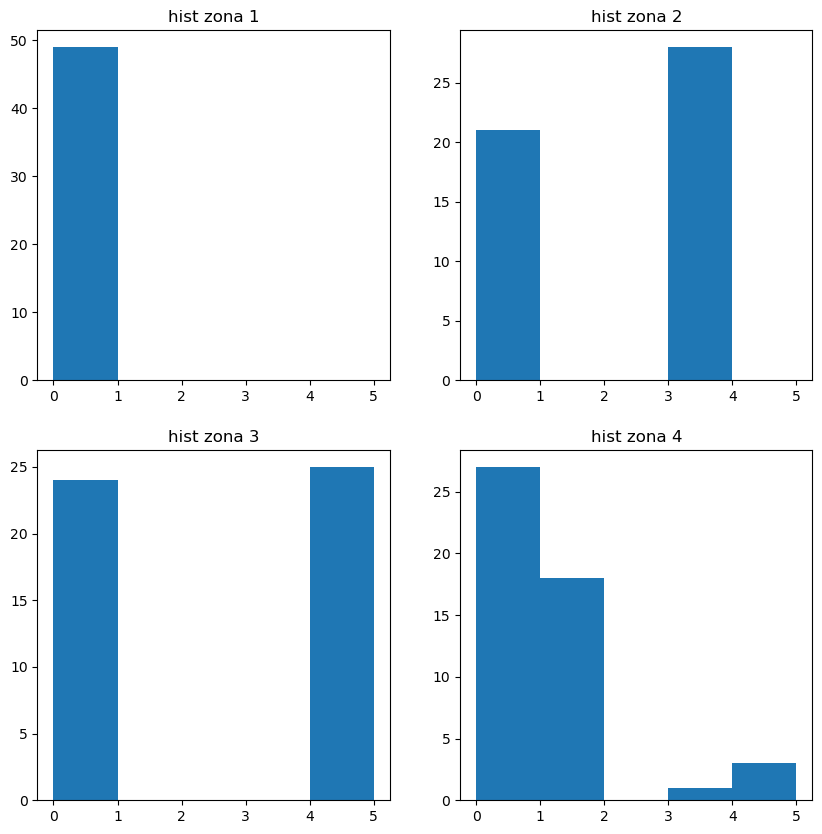

In [90]:
# plot histogram of each zone:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(hist_zona1.ravel(), bins=5, range=(0, 5))
axs[0, 1].hist(hist_zona2.ravel(), bins=5, range=(0, 5))
axs[1, 0].hist(hist_zona3.ravel(), bins=5, range=(0, 5))
axs[1, 1].hist(hist_zona4.ravel(), bins=5, range=(0, 5))
#add title to each subplot:
axs[0, 0].set_title('hist zona 1')
axs[0, 1].set_title('hist zona 2')
axs[1, 0].set_title('hist zona 3')
axs[1, 1].set_title('hist zona 4')

plt.show()


In [96]:
# PENDIENTE: Analizar los resultados y ver si son consistentes.